Sayan Bandyopadhyay
SBU ID 110946522

In [1]:
%matplotlib inline
import matplotlib as mlp
import scipy
import numpy as np
import sympy
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from sklearn.preprocessing import scale
from scipy.stats.stats import pearsonr 
from sklearn.linear_model import LinearRegression
from sklearn import cross_validation
from sklearn import metrics


/usr/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Population Data Map
The below Data map shows the population of countries. The interesting thing to notice here is the fact that most of the entire population is located in a circle containing China, India, Bangladesh, Indonesia, Pakistan etc.

Country Name
Country Code
Government Type
Capital City
Date of Founding/Independence
Latitude of Capital
Longitude of Capital
Population
Life Expectancy
GDP (PPP) in US $
Area (sq km)
Land Boundaries (km)
Coastline (km)
Literacy Rate (%)
Health Expenditure/GDP
Military Expenditure/GDP
Renewable Water Resources (cu km)
Net Migration Rate/1000 Population
Labor Force
Internet Users (circa 2009)
Commercial Prime Lending Rate

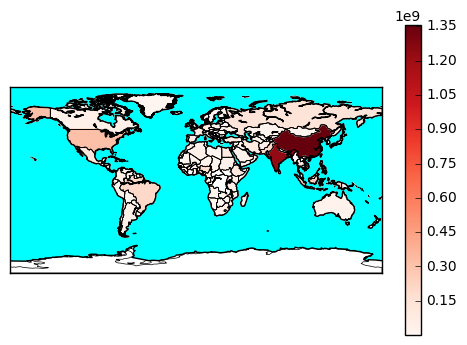

In [2]:
col_name = []
country_data = pd.read_csv("./country-data.csv", na_values='unknown')

for name in country_data:
    print name

for name in country_data:
    col_name.append(name)

col_name = col_name[7:]

country_data = country_data.replace("1.78%",1.78)

for i in col_name:
    country_data[i] = (country_data[i].fillna(country_data[i].astype(float).mean())).astype(float)
####################
#create Datamap
####################
map = Basemap(width=24000000,height=18000000,projection='cyl',
        resolution='c',lat_1=45,lat_2=54,lat_0=50,lon_0=0)
# draw coastlines.
map.drawcoastlines()
map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='white',lake_color='cyan')
map.drawcountries()

# load the shapefile, use the name 'name'


map.readshapefile('ne_110m_admin_0_countries', name='country', drawbounds=True)

# collect the  names from the shapefile attributes so we can
# look up the shape obect for a country by it's name

country_names = []
colors = []
patches = []
colormap = plt.get_cmap('Reds')
for shape_dict in map.country_info:
    country_names.append(shape_dict['name'])


for i in range (0, len(country_data)):
    color = colormap(country_data.at[i,'Population']/float(country_data['Population'].max()))
    colors.append(color)
    ax = plt.gca() # get current axes instance

    try:
        find_name = country_data.at[i,'Country Name']
        indices = [j for j, x in enumerate(country_names) if x == find_name]
        for k in indices:
            seg = map.country[k]
            poly = Polygon(seg, facecolor=color,edgecolor=color)
            patches.append(poly)
            ax.add_patch(poly)
    except ValueError:
        pass


p = PatchCollection(patches, cmap=colormap)
p.set_array(np.array(country_data['Population']))
cb = plt.colorbar(p)

plt.show()





# Scatter plot - Health exp/GDP vs GDP/Capita
The below plot reveals that there might be a correlation between the 2 entities. Countries with higher GDP definitely spend more on Health

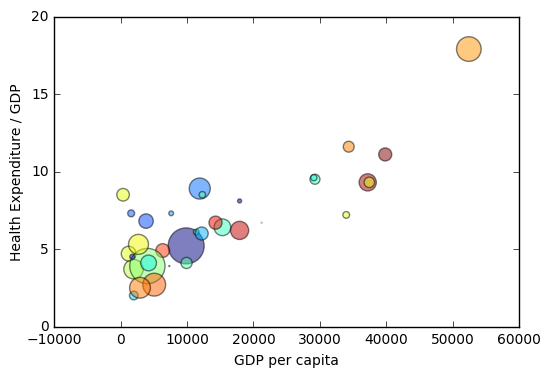

In [3]:
####################
#create Scatter plots
####################
## Health exp/GDP  vs  GDP/Capita
#insert some new data based on pop

gdp_pc = np.float32(country_data['GDP (PPP) in US $']) /  np.float32(country_data['Population'])
country_data.insert(1,'GDP per capita', gdp_pc )


normed_pop = np.array((country_data['Population'] - country_data['Population'].mean()) /
                                        country_data['Population'].std(ddof=0))
#create scatter plot for each country
x = np.float32(country_data['GDP per capita'])
y = np.float32(country_data['Health Expenditure/GDP'])

colors = np.random.rand(len(country_data))
area = np.pi * (np.log10(normed_pop*100)*2)**3  # 0 to 15 point radiuses

plt.scatter(x, y, s=area, c=colors, alpha=0.5)

plt.xlabel("GDP per capita")
plt.ylabel("Health Expenditure / GDP")
plt.show()

# Scatter plot - Literacy Rate vs Labor Force
In the below plot, it can be seen that the countries are distributed towards the X-axis. This might be because Labor force measures do not reveal the income of the work force in question. Countries with bigger population (shown by the size of the dots) tend to have the biggest work forces. It can be seen that the 2 countries with the biggest populations, India and China, have obviously the biggest Labor force.

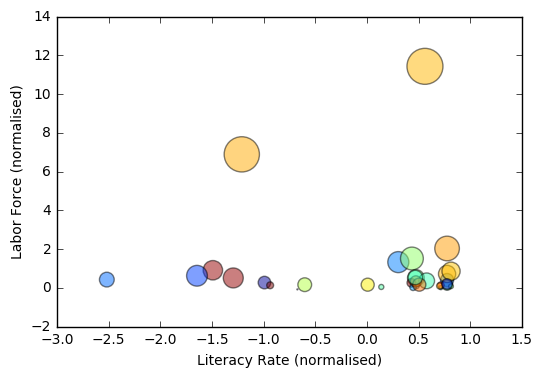

In [4]:
####################
#create Scatter plots
####################
## Literacy  vs  Labor Force

normed_lit = np.array((country_data['Literacy Rate (%)'] - country_data['Literacy Rate (%)'].mean()) /
                  country_data['Literacy Rate (%)'].std(ddof=0))

normed_lab = np.array((country_data['Labor Force'] - country_data['Labor Force'].mean()) /
                  country_data['Labor Force'].std(ddof=0))
#create scatter plot for each country
x = normed_lit
y = normed_lab

colors = np.random.rand(len(country_data))
area = np.pi * (np.log10(normed_pop*100)*2)**3  # 0 to 15 point radiuses

plt.scatter(x, y, s=area, c=colors, alpha=0.5)

plt.xlabel("Literacy Rate (normalised)")
plt.ylabel("Labor Force (normalised)")
plt.show()

# Histogram - Military exp/GDP

The below histogram reveals that most countries spend equivalently on military. Looks like very few countries spend more than their financial capabilities.

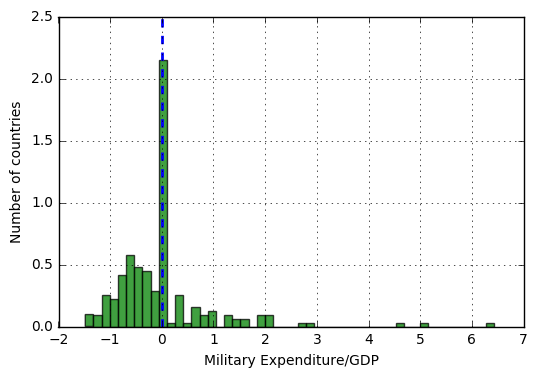

In [5]:
####################
#create Histograms
####################
## Military Expenditure/GDP

normed_mil = np.array((country_data['Military Expenditure/GDP'] - country_data['Military Expenditure/GDP'].mean()) /
                      country_data['Military Expenditure/GDP'].std(ddof=0))

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.hist(normed_mil, 50, normed=1, facecolor='green', alpha=0.75)
ax1.set_xlabel('Military Expenditure/GDP')
ax1.set_ylabel('Number of countries')
ax1.axvline(normed_mil.mean(), color='b', linestyle='dashed', linewidth=2)
ax1.grid(True)

# Histogram - Internet Users

The below histogram reveals that most countries are on the lower end of internet users spectrum. The mean is low. However, a graph showing internet users/ total pop would reveal more interesting results.

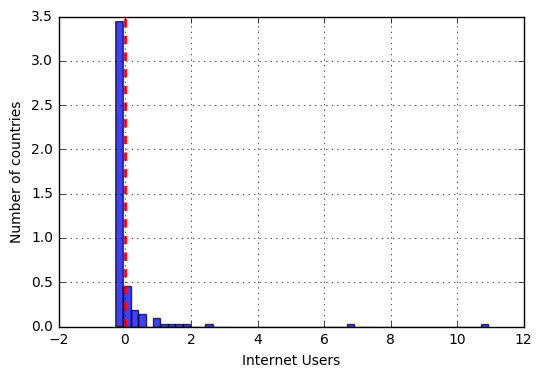

In [6]:
## Internet Users

normed_internet = np.array((country_data['Internet Users (circa 2009)'] - country_data['Internet Users (circa 2009)'].mean()) /
                      country_data['Internet Users (circa 2009)'].std(ddof=0))

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.hist(normed_internet, 50, normed=1, facecolor='blue', alpha=0.75)
ax2.set_xlabel('Internet Users')
ax2.set_ylabel('Number of countries')
ax2.axvline(normed_internet.mean(), color='r', linestyle='dashed', linewidth=2)
ax2.grid(True)

# Question 2 - Pearson Coefficient and Permutation test

In [7]:
######## Q2 ############
max_p_val = 0
min_p_val=0

max_k_val = 0
min_k_val=0

corr_matrix = np.zeros(shape=(len(col_name),len(col_name)))
for i in range(0,len(col_name)):
    for j in range(0,len(col_name)):
        if (i != j):
            [k,p]=pearsonr(country_data[col_name[i]].astype(float), country_data[col_name[j]].astype(float))
            corr_matrix[i][j] = float(k)
            if(max_k_val < k):
                max_k_val = k
                max_p_val = p
            if(min_k_val > k):
                min_k_val = k
                min_p_val = p

i_max,j_max = np.unravel_index(corr_matrix.argmax(), corr_matrix.shape)
i_min,j_min = np.unravel_index(corr_matrix.argmin(), corr_matrix.shape)

print "Most correlated metrics are " + col_name[i_max] + " and " + col_name[j_max] + " with factor", corr_matrix[i_max][j_max]


### Permutation test
permute = []
count_max_p_val=0
count_min_p_val=0
permutation_test = 10000


for i in range(0, permutation_test):
    [k,p]=pearsonr(country_data[col_name[i_max]].astype(float),
                   np.random.permutation(country_data[col_name[j_max]].astype(float)))
    permute.append(k)
    #now check the number of tests for which the correlation is higher than the actual value
    if( k > corr_matrix[i_max][j_max]):
        count_max_p_val +=1


print "max value in permutation test =", max_k_val
print "max p_value in permutation test =", max_p_val
print "Fractions producing correlation higher =",(count_max_p_val/permutation_test)

permute = []
for i in range(0, permutation_test):
    [k,p]=pearsonr(country_data[col_name[i_min]].astype(float),
                   np.random.permutation(country_data[col_name[j_min]].astype(float)))
    permute.append(k)
    #now check the number of tests for which the correlation is higher than the actual value
    if( k < corr_matrix[i_min][j_min]):
        count_min_p_val +=1


        
print "\n\nLeast correlated metrics are " + col_name[i_min] + " and " + col_name[j_min] + " with factor", corr_matrix[i_min][j_min]
print "min value in permutation test =", min_k_val
print "min p_value in permutation test =", min_p_val

print "Fractions producing correlation Lower =",(count_min_p_val/permutation_test)


Most correlated metrics are Population and Labor Force with factor 0.980172630031
max value in permutation test = 0.980172630031
max p_value in permutation test = 4.75192220857e-139
Fractions producing correlation higher = 0


Least correlated metrics are Life Expectancy and Commercial Prime Lending Rate with factor -0.441828547965
min value in permutation test = -0.441828547965
min p_value in permutation test = 8.06070133067e-11
Fractions producing correlation Lower = 0


# Question 3 - Linear Regression

In the below test result, GDP per capita is showing least error with Life expectancy.

Population  vs GDP per capita Error ->  1.38105859948


/usr/local/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


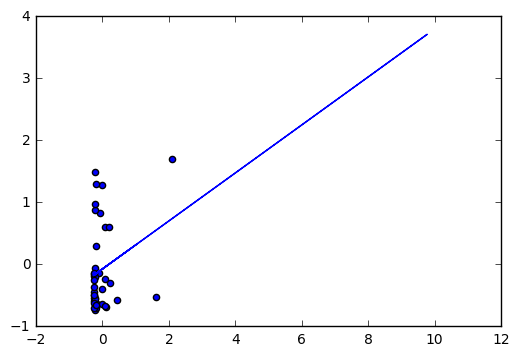

Life Expectancy  vs GDP per capita Error ->  0.798271294795


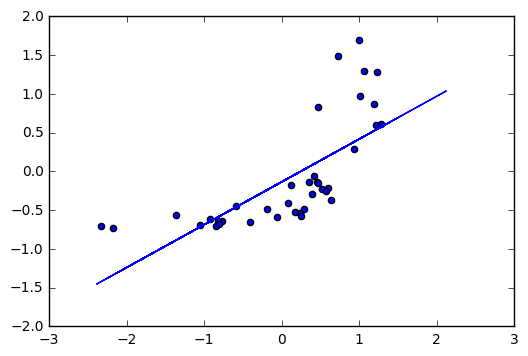

GDP (PPP) in US $  vs GDP per capita Error ->  1.15931587033


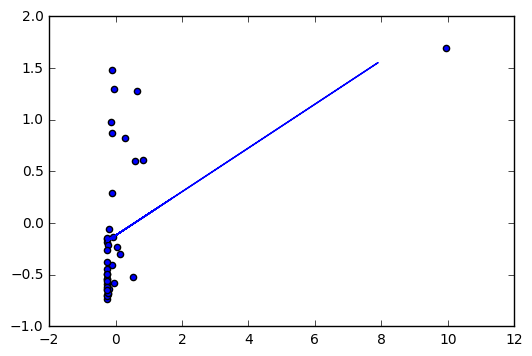

Area (sq km)  vs GDP per capita Error ->  1.25648418878


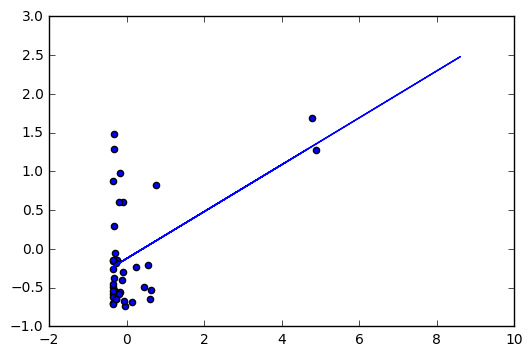

Land Boundaries (km)  vs GDP per capita Error ->  1.29014131103


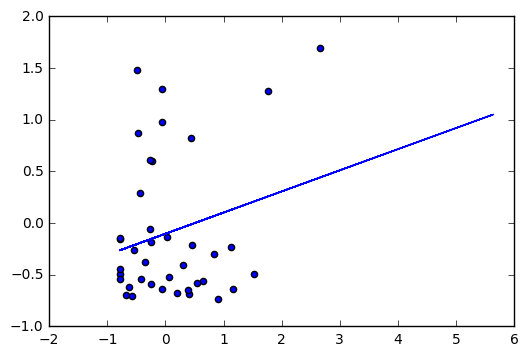

Coastline (km)  vs GDP per capita Error ->  1.13715270497


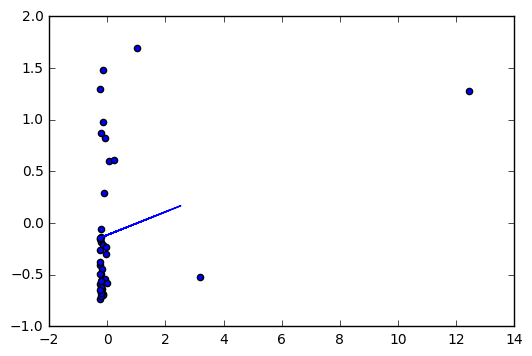

Literacy Rate (%)  vs GDP per capita Error ->  0.966438811411


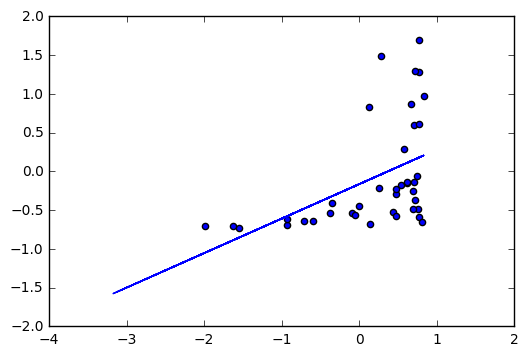

Health Expenditure/GDP  vs GDP per capita Error ->  1.23564889154


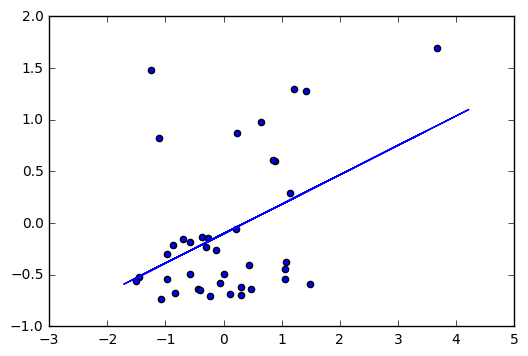

Military Expenditure/GDP  vs GDP per capita Error ->  1.26180894065


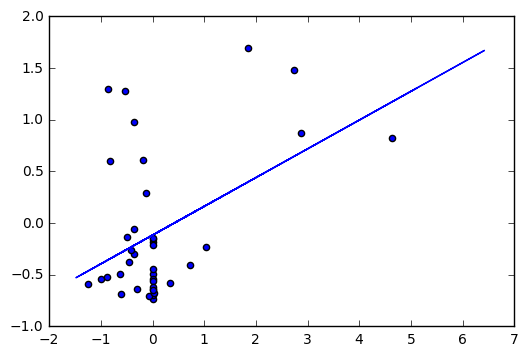

Renewable Water Resources (cu km)  vs GDP per capita Error ->  1.22286636492


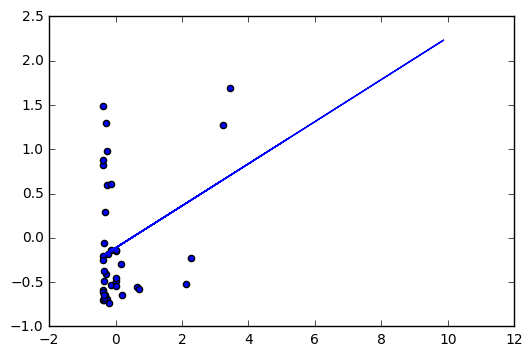

Net Migration Rate/1000 Population  vs GDP per capita Error ->  1.48288231626


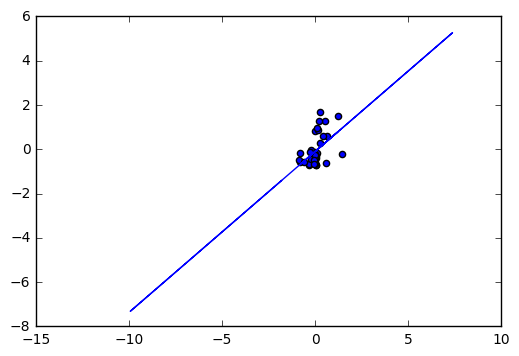

Labor Force  vs GDP per capita Error ->  1.38761060008


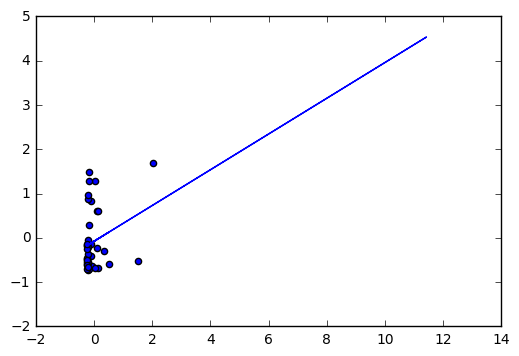

Internet Users (circa 2009)  vs GDP per capita Error ->  1.21979628174


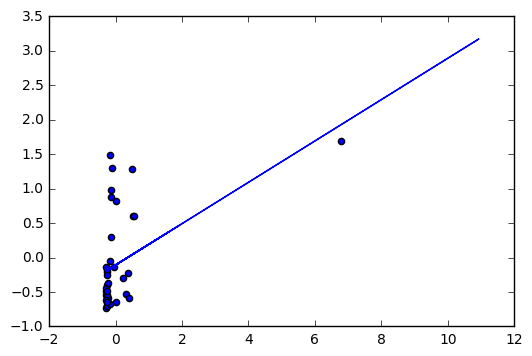

Commercial Prime Lending Rate  vs GDP per capita Error ->  1.18031070677


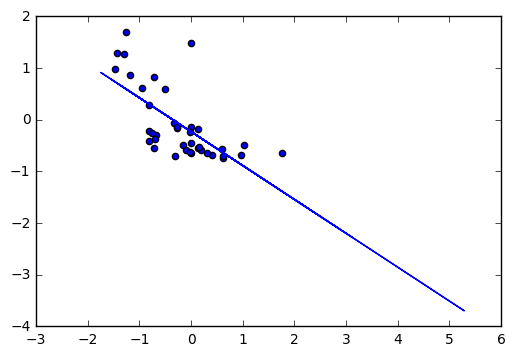

In [8]:
############## Q3 ############

normed_gdp_pc = np.array((country_data['GDP per capita'] - country_data['GDP per capita'].mean()) /
                  country_data['GDP per capita'].std(ddof=0))

country_data = country_data.replace("1.78%",1.78)

for i in col_name:
    country_data[i] = (country_data[i].fillna(country_data[i].astype(float).mean())).astype(float)

for name in col_name:

    normed_value = np.array((country_data[name] - country_data[name].mean()) /
                  country_data[name].std(ddof=0))


    X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(normed_value.reshape(-1,1),
                                            normed_gdp_pc.reshape(-1,1), test_size = 0.8, random_state = 0)
    linReg = LinearRegression()
    linReg.fit(X_train, Y_train)
    error = metrics.mean_squared_error(Y_test, linReg.predict(X_test))
    print name ," vs GDP per capita Error -> ",error
    plt.scatter(X_train, Y_train)

    plt.plot(X_test, linReg.predict(X_test))
    plt.show()


#  Question 4 - Calculating Social Welfare

Some Economists, like Amartya Sen, have proposed ways to measure social welfare of an economic state. However, most of the measure, apart from GDP being of the highest importance, take wealth inequality as a huge measure in order to calculate social welfare. In lieu of this information not being available, Social welfare of a country has been calculated based upon GDP per Capita, and other HDI indicators. Some would argue that Literacy rate and miltary strength should be taken into account because security and education should count in social welfare.

Monaco made to the top of the list. Many deserving nations are present in the top 10 including Norway and Switzerland. 
Points noticed are as follows ->
    
    1. When only considering GDP per capita, countries like Brunei made to the top of the list. This is because Brunei is a very rich nation due to a lot of Oil and their population is relatively low. However their wealth distribution is not very good and they have a relatively low HDI. Same goes for some gulf countries as well.
    2. Bottom of the list is dominated by developing nations as is expected. But there are skewed results like Zimbabwe which is nearly a failed state is above many relatively doing well nations like Pakistan, Nigeria and Myanmar(Burma).
    
Overall, this measure lacks a lot of accuracy mostly because a good data regarding wealth distribution wasn't present.
    

In [9]:
############## Q4 ############

country_names = country_data[['Country Name']]

#Normalise the required data -> gdp/pop, internet_users/pop,

normed_life = np.array(list((country_data['Life Expectancy'] - country_data['Life Expectancy'].mean()) /
                  country_data['Life Expectancy'].std(ddof=0)))

normed_gdp = np.array(list((country_data['GDP per capita'] - country_data['GDP per capita'].mean()) /
                  country_data['GDP per capita'].std(ddof=0)))
normed_health = np.array(list((country_data['Health Expenditure/GDP'] - country_data['Health Expenditure/GDP'].mean()) /
                  country_data['Health Expenditure/GDP'].std(ddof=0)))

#Fill in the nan values with definite values
normed_health = np.nan_to_num(normed_health)

### Scoring function

normed_data = normed_life * 0.3 + normed_gdp * 0.7 + normed_health*0.4

country_names.insert(1,'Social Welfare Index', normed_data)

result = country_names.sort_values(by=['Social Welfare Index'], ascending=[0])
result

,Country Name,Social Welfare Index
116,Monaco,6.416227
187,United States,2.957332
100,Liechtenstein,2.649434
102,Luxembourg,2.564085
141,Qatar,2.108095
130,Norway,1.917304
169,Switzerland,1.899192
125,Netherlands,1.854401
31,Canada,1.834477
9,Austria,1.713598


#  Question 5 - Calculating Neighboring States

The definition of a country being "similar" to another is very vague. One usually thinks of cultural similarity when bombarded with this question. If you ask for Japan, one would usually reply with China, South Korea, Taiwan. Similarly for Denmark, it will be Sweden, Norway and Finland.

However, to find out what other countries might be similar to one, we can take other factors like Life expectancy, GDP per capita, internet users and other such metrics into consideration. A statistical distance can be calculated and then the countries can be clustered based upon this distance.

Total of 10 neighboring countries have been printed along with closest and farthest neighbors

Observations ->
1. Strange pairs like (India Syria), (Canada	Switzerland), (Brazil	Montenegro), (Greenland	Bahamas, The) (China	Tonga) and many others have been observed.
2. Interesting pairs like (Brunei	United Arab Emirates) -> Both are Oil based extremely rich small countries.
                     (Singapore	Kuwait) -> Both are Trading focal points and major seaports.
                     (Iceland	Sweden) -> Nordic countries
                     
3. Goof up in farthest neighbor being nearly same for all.
    
Even though the most neighboring countries might be a little skewed, the top 10 set shows better results.

In [10]:
############## Q5 ############

internet_users_pc = np.float32(country_data['Internet Users (circa 2009)']) /  np.float32(country_data['Population'])
country_data.insert(1,'Internet users per capita', internet_users_pc )

internet_users = country_data[['Country Name','Internet Users (circa 2009)']]

# Normalise the required data -> gdp/pop, internet_users/pop,


normed_internet = np.array(list((country_data['Internet users per capita'] - country_data['Internet users per capita'].mean()) /
                  country_data['Internet users per capita'].std(ddof=0)))

normed_life = np.array(list((country_data['Life Expectancy'] - country_data['Life Expectancy'].mean()) /
                  country_data['Life Expectancy'].std(ddof=0)))

normed_gdp = np.array(list((country_data['GDP per capita'] - country_data['GDP per capita'].mean()) /
                  country_data['GDP per capita'].std(ddof=0)))
normed_health = np.array(list((country_data['Health Expenditure/GDP'] - country_data['Health Expenditure/GDP'].mean()) /
                  country_data['Health Expenditure/GDP'].std(ddof=0)))

arr = np.array([normed_gdp, normed_internet, normed_life, normed_health])

distance_matrix = np.zeros(shape=(197,197))

dataframe_final = pd.DataFrame(columns=('Country','Closest','Farthest'))

for i in range (0, len(country_data)):

    #calculate distance for ith country wrt every other country

    for j in range (0, len(country_data)):

        # calculate distance between the 2 countries and keep in array
        if ( i==j):
            distance_matrix[i][j] = 0
        else:
            distance_matrix[i][j] = scipy.spatial.distance.euclidean(arr[:,i],arr[:,j])

    #sort the list

    print country_data.iat[i,0] + " = "
    temp_array = distance_matrix[i].argsort()

    dataframe_final.loc[i] = [country_data.iat[i,0], country_data.iat[temp_array[1],0], country_data.iat[temp_array[len(country_data)-1],0]]
    print (" ".join(country_data.iat[k,0] for k in distance_matrix[i].argsort()[1:12]))
    
print dataframe_final
dataframe_final.to_csv("./final.csv")

Afghanistan = 
Uganda Swaziland South Africa Congo, Democratic Republic of the Somalia South Sudan Mozambique Zimbabwe Burundi Rwanda Mali
Albania = 
Lebanon Tunisia Morocco Macedonia Dominica Dominican Republic Colombia Saint Lucia Ecuador Mexico Tonga
Algeria = 
Sri Lanka Libya Thailand Armenia Vanuatu Saint Vincent and the Grenadines Philippines Egypt China Tonga Fiji
Andorra = 
San Marino Israel Taiwan Korea, South Finland Czech Republic Iceland Malta Australia Japan United Kingdom
Angola = 
Congo, Republic of the Central African Republic Gabon Cameroon Niger Botswana Nigeria Namibia Chad Ethiopia Benin
Antigua and Barbuda = 
Mauritius Dominica Mexico Romania Colombia Poland Grenada Venezuela Lebanon Estonia Lithuania
Argentina = 
Uruguay Panama Croatia Chile Cyprus Hungary Saint Lucia Lithuania Bulgaria Barbados Slovakia
Armenia = 
Thailand Vanuatu Egypt Philippines Algeria Fiji Peru Libya Jamaica Cabo Verde China
Australia = 
Iceland Sweden Ireland United Kingdom Finland Japan No